In [72]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import plotly.graph_objects as go

In [76]:

principal_widget = widgets.FloatSlider( value=200000, min=0, max=1000000, step=100, description='Principal:', readout_format='.0f', )
annual_interest_rate_widget = widgets.FloatSlider( value=0.05, min=0, max=0.25, step=0.001, description='Interest Rate:', readout_format='.2f', )
years_widget = widgets.IntSlider( value=30, min=1, max=50, step=1, description='Years:', readout_format='.0f', )

display(principal_widget, annual_interest_rate_widget, years_widget)

FloatSlider(value=200000.0, description='Principal:', max=1000000.0, readout_format='.0f', step=100.0)

FloatSlider(value=0.05, description='Interest Rate:', max=0.25, step=0.001)

IntSlider(value=30, description='Years:', max=50, min=1, readout_format='.0f')

In [77]:
#principal = 200000  
#annual_interest_rate = 0.04  
#years = 30  

principal = principal_widget.value
annual_interest_rate = annual_interest_rate_widget.value
years = years_widget.value



$$ \text{Monthly Payment} = \frac{{\text{Principal} \cdot \left(\text{Monthly Interest Rate} \cdot \left(1 + \text{Monthly Interest Rate}\right)^{\text{Number of Payments}}\right)}}{{\left(1 + \text{Monthly Interest Rate}\right)^{\text{Number of Payments}} - 1}}
$$

In [78]:
# Calculate monthly interest rate and number of payments
monthly_interest_rate = annual_interest_rate / 12
num_payments = years * 12

#Calculate monthly mortgage payment
monthly_payment = principal * (monthly_interest_rate * (1 + monthly_interest_rate)**num_payments) / ((1 + monthly_interest_rate)**num_payments - 1)
print('Monthly payment: $%.2f' % monthly_payment)
print('Total payment: $%.2f' % (monthly_payment * num_payments))
print('Total interest: $%.2f' % (monthly_payment * num_payments - principal))
print('Total Principal: $%.2f' % principal)
print('Interest to principal ratio: %.2f' % ((monthly_payment * num_payments - principal) / principal))

Monthly payment: $2719.00
Total payment: $978840.55
Total interest: $472340.55
Total Principal: $506500.00
Interest to principal ratio: 0.93


In [67]:
# Initialize lists to store payment data
payment_schedule = []
principal_schedule = []
interest_schedule = []

# Calculate payments and amounts for each month
remaining_balance = principal

for month in range(1, num_payments + 1):
    # Calculate interest payment for the current month
    interest_payment = remaining_balance * monthly_interest_rate
    
    # Calculate principal payment for the current month
    principal_payment = monthly_payment - interest_payment
    
    # Update the remaining balance
    remaining_balance -= principal_payment
    
    # Append data to lists
    payment_schedule.append(monthly_payment)
    principal_schedule.append(principal_payment)
    interest_schedule.append(interest_payment)

# Print the first few payment details

print("\nPayment Schedule for the first few months:")
for month in range(5):
    print(f"Month {month + 1}: Payment ${payment_schedule[month]:.2f} (Principal ${principal_schedule[month]:.2f}, Interest ${interest_schedule[month]:.2f})")
print("\nPayment Schedule for the last few months:")
for month in range(num_payments - 5, num_payments):
    print(f"Month {month + 1}: Payment ${payment_schedule[month]:.2f} (Principal ${principal_schedule[month]:.2f}, Interest ${interest_schedule[month]:.2f})")



Payment Schedule for the first few months:
Month 1: Payment $1073.64 (Principal $240.31, Interest $833.33)
Month 2: Payment $1073.64 (Principal $241.31, Interest $832.33)
Month 3: Payment $1073.64 (Principal $242.32, Interest $831.33)
Month 4: Payment $1073.64 (Principal $243.33, Interest $830.32)
Month 5: Payment $1073.64 (Principal $244.34, Interest $829.30)

Payment Schedule for the last few months:
Month 356: Payment $1073.64 (Principal $1051.55, Interest $22.09)
Month 357: Payment $1073.64 (Principal $1055.93, Interest $17.71)
Month 358: Payment $1073.64 (Principal $1060.33, Interest $13.31)
Month 359: Payment $1073.64 (Principal $1064.75, Interest $8.89)
Month 360: Payment $1073.64 (Principal $1069.19, Interest $4.45)


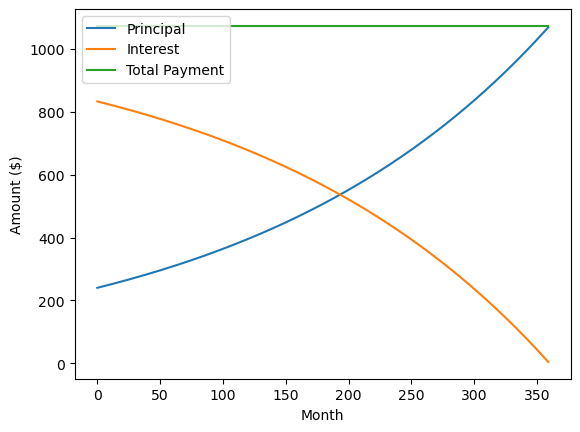

In [68]:
# Plot the total interest and principal component of each monthly payment over time
plot = plt.figure()
plt.plot(principal_schedule)
plt.plot(interest_schedule)
plt.plot(payment_schedule)
plt.legend(['Principal', 'Interest', 'Total Payment'], loc='upper left')
plt.xlabel("Month")
plt.ylabel("Amount ($)")
plt.show()

In [51]:
#Plotly version of the same graph

plot = go.Figure()
plot.add_trace(go.Scatter(y=principal_schedule, name="Principal"))
plot.add_trace(go.Scatter(y=interest_schedule, name="Interest"))
plot.add_trace(go.Scatter(y=payment_schedule, name="Payment"))
plot.update_layout(title="Mortgage Amortization Schedule", xaxis_title="Payment Number", yaxis_title="Payment")
plot.show()


In [69]:
#Let's do this for an investment instead of a mortgage
# We will calculate the future value of an investment
# Create widgets
principal_widget = widgets.FloatSlider(value=1000, min=1, max=10000, step=1, description='Principal')
rate_widget = widgets.FloatSlider(value=0.05, min=0.01, max=0.2, step=0.01, description='Interest Rate')
time_widget = widgets.IntSlider(value=10, min=1, max=30, step=1, description='Time (Years)')
n_widget = widgets.IntSlider(value=12, min=1, max=365, step=1, description='Compounding Frequency')
display(principal_widget, rate_widget, time_widget, n_widget)


FloatSlider(value=1000.0, description='Principal', max=10000.0, min=1.0, step=1.0)

FloatSlider(value=0.05, description='Interest Rate', max=0.2, min=0.01, step=0.01)

IntSlider(value=10, description='Time (Years)', max=30, min=1)

IntSlider(value=12, description='Compounding Frequency', max=365, min=1)

In [70]:
# Define a function to calculate future value
def calculate_future_value(principal, rate, time, n):
    years = np.arange(0, time + 1)
    future_values = principal * (1 + rate / n) ** (n * years)
    return years, future_values

# Calculate and plot the future value of the investment
years, future_values = calculate_future_value(principal_widget.value, rate_widget.value, time_widget.value, n_widget.value)

print("At time = %d years, the future value of the investment is $%.2f" % (time_widget.value, future_values[-1]))

At time = 10 years, the future value of the investment is $1647.01


In [60]:
# Plot the future value of the investment over time

fig = go.Figure()
fig.add_trace(go.Scatter(x=years, y=future_values, mode='lines'))
fig.update_layout(title="Future Value Over Time", xaxis_title="Years", yaxis_title="Future Value")
fig.show()


In [71]:
def compare_interest_rates(principal, years, interest_rates):
    results = []
    
    for rate in interest_rates:
        # Calculate monthly interest rate and number of payments
        monthly_interest_rate = rate / 12
        num_payments = years * 12

        # Calculate monthly mortgage payment
        monthly_payment = principal * (monthly_interest_rate * (1 + monthly_interest_rate)**num_payments) / ((1 + monthly_interest_rate)**num_payments - 1)

        # Calculate total payment and total interest paid
        total_payment = monthly_payment * num_payments
        total_interest_paid = total_payment - principal

        # Calculate the total interest as a percentage of the total payment
        interest_as_percent_of_payment = (total_interest_paid / total_payment) * 100

        results.append({
            "interest_rate": rate,
            "monthly_payment": monthly_payment,
            "total_payment": total_payment,
            "total_interest_paid": total_interest_paid,
            "interest_as_percent_of_payment": interest_as_percent_of_payment
        })
    
    return results

# Example usage
principal_amount = 200000  # Principal amount of the loan
loan_term_years = 30  # Loan term in years
interest_rates_to_compare = [0.04, 0.08]

results = compare_interest_rates(principal_amount, loan_term_years, interest_rates_to_compare)

for result in results:
    print(f"Interest Rate: {result['interest_rate'] * 100}%")
    print(f"Monthly Payment: ${result['monthly_payment']:.2f}")
    print(f"Total Payment: ${result['total_payment']:.2f}")
    print(f"Total Interest Paid: ${result['total_interest_paid']:.2f}")
    print(f"Interest as % of Payment: {result['interest_as_percent_of_payment']:.2f}%")
    print()



Interest Rate: 4.0%
Monthly Payment: $954.83
Total Payment: $343739.01
Total Interest Paid: $143739.01
Interest as % of Payment: 41.82%

Interest Rate: 8.0%
Monthly Payment: $1467.53
Total Payment: $528310.49
Total Interest Paid: $328310.49
Interest as % of Payment: 62.14%



In [9]:
def compare_loan_terms(principal, years, interest_rate):
    results = []
    
    for loan_term in years:
        # Calculate monthly interest rate and number of payments
        monthly_interest_rate = interest_rate / 12
        num_payments = loan_term * 12

        # Calculate monthly mortgage payment
        monthly_payment = principal * (monthly_interest_rate * (1 + monthly_interest_rate)**num_payments) / ((1 + monthly_interest_rate)**num_payments - 1)

        # Calculate total payment and total interest paid
        total_payment = monthly_payment * num_payments
        total_interest_paid = total_payment - principal

        # Calculate the total interest as a percentage of the total payment
        interest_as_percent_of_payment = (total_interest_paid / total_payment) * 100

        results.append({
            "loan_term": loan_term,
            "monthly_payment": monthly_payment,
            "total_payment": total_payment,
            "total_interest_paid": total_interest_paid,
            "interest_as_percent_of_payment": interest_as_percent_of_payment
        })
    
    return results

# Example usage
principal_amount = 200000  # Principal amount of the loan
interest_rate = 0.05  # Annual interest rate (5%)
loan_terms_to_compare = [15, 30]

results = compare_loan_terms(principal_amount, loan_terms_to_compare, interest_rate)

for result in results:
    print(f"Loan Term: {result['loan_term']} years")
    print(f"Monthly Payment: ${result['monthly_payment']:.2f}")
    print(f"Total Payment: ${result['total_payment']:.2f}")
    print(f"Total Interest Paid: ${result['total_interest_paid']:.2f}")
    print(f"Interest as % of Payment: {result['interest_as_percent_of_payment']:.2f}%")
    print()


Loan Term: 15 years
Monthly Payment: $1581.59
Total Payment: $284685.71
Total Interest Paid: $84685.71
Interest as % of Payment: 29.75%

Loan Term: 30 years
Monthly Payment: $1073.64
Total Payment: $386511.57
Total Interest Paid: $186511.57
Interest as % of Payment: 48.26%

